In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.shape


(768, 9)

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df['Outcome'] = df['Outcome'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [13]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [14]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [15]:
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125,96.000000,20.536458,79.799479,31.992578,0.232,54,1


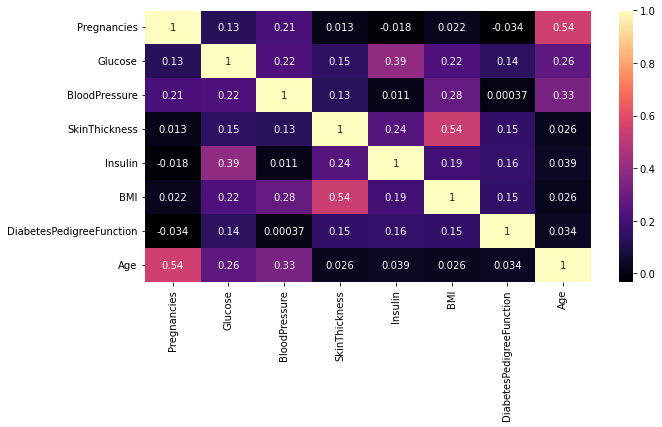

In [20]:
plt.figure(figsize=(10,5))
g=sns.heatmap(df.corr(),annot=True,cmap="magma")

In [26]:
x = df.drop(["BloodPressure", "Insulin", "DiabetesPedigreeFunction", "Outcome"], axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = tts(x, y, train_size = 0.8, random_state = 1)

In [22]:
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)


SVC(probability=True)

In [27]:
y_pred = model_svm.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7857142857142857

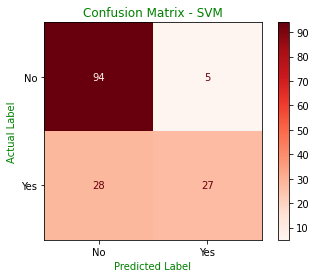

In [31]:
from sklearn.metrics import plot_confusion_matrix
classNames = ['No', 'Yes']
color ='Green'
matrix = plot_confusion_matrix(model_svm, X_test,y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion Matrix - SVM', color = color)

plt.xlabel('Predicted Label', color =color)
plt.ylabel('Actual Label', color = color)

tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames)
plt.yticks(tick_marks,classNames)

plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        99
           1       0.84      0.49      0.62        55

    accuracy                           0.79       154
   macro avg       0.81      0.72      0.74       154
weighted avg       0.80      0.79      0.77       154



In [39]:
from sklearn.metrics import roc_curve, roc_auc_score
def performance_record(clf):
    pred = clf.predict(X_test) 
    fpr, tpr, threshold = roc_curve(y_test, model_svm.predict_proba(X_test)[:,1])
    roc_auc_score_ = roc_auc_score(y_test,pred)
    plt.figure()
    plt.plot(fpr,tpr, label="Roc_AUC_score (area = %0.2f)" %roc_auc_score_)
    plt.plot([0,1],[0,1], "b--")
    plt.xlabel('True postive rate')
    plt.ylabel('False Postive rate')
    plt.legend(loc="lower right")

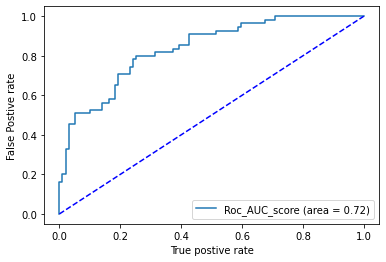

In [40]:
performance_record(model_svm)